In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
table_list = []
for filename in os.listdir("./results"):
    if filename[-4:] != ".npy": continue
    # Read the number of guesses per iteration
    path = Path(f"./results/{filename}")
    with open(path, 'rb') as f:
        guesses = np.load(f)
    # Parse parameters from file name
    params = filename[:-4].split()
    max_guesses = int(params[9])
    results = {
        "elitist": params[1] == "True",
        "memetic": params[3] == "True",
        "k": int(params[5]),
        "mu": float(params[7]),
        "selection": params[11],
        "number of guesses": guesses,
        "mean number of guesses": guesses.mean(),
        "failed_games": (guesses >= max_guesses).sum()}
    table_list.append(results)

In [3]:
table = pd.DataFrame(table_list)
print(table.shape)
# k does not influence probabilistic selection so we should drop rows where only k differs
table.drop(table[(table['selection'] == 'probabilistic_selection') & (table['k'] != 2)].index, inplace=True)
print(table.shape)
table.loc[table['selection'] == 'probabilistic_selection', 'k'] = None

(192, 8)
(120, 8)


In [4]:
aggr_funcs = {'failed_games': 'mean', 'mean number of guesses': 'mean'}

In [5]:
table_tournament = table[table['selection'] == 'tournament_selection']
table_k_mu = table_tournament.groupby(['k', 'mu']).aggregate(aggr_funcs)
table_k_mu[:9]

failed_games  mean number of guesses
k   mu                                         
2.0 0.000         72.50                  22.471
    0.001         71.00                  22.572
    0.010         42.75                  17.794
    0.080          0.50                   6.677
    0.100          1.00                   6.143
    0.150          0.00                   4.343
3.0 0.000         79.00                  23.553
    0.001         80.50                  24.483
    0.010         50.50                  19.010

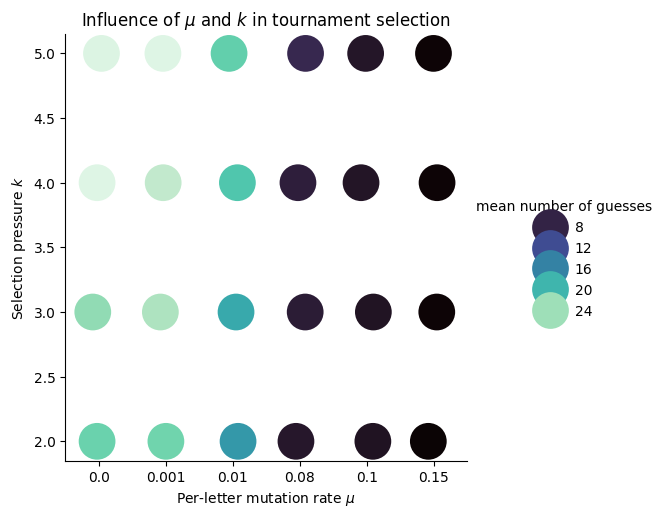

In [6]:
palette = 'mako'
# Create a scatter plot using catplot to ensure equidistant spacing
g = sns.catplot(
    data=table_k_mu,
    x='mu',
    y='k',
    hue='mean number of guesses',
    palette=palette,
    height=5,
    #aspect=1.2,
    s=700  # Adjust the size of the points if needed
)

plt.xlabel('Per-letter mutation rate $\mu$')
plt.ylabel('Selection pressure $k$')
plt.title('Influence of $\mu$ and $k$ in tournament selection')

plt.show()

In [7]:
table_k = table_tournament.groupby('k').aggregate(aggr_funcs)

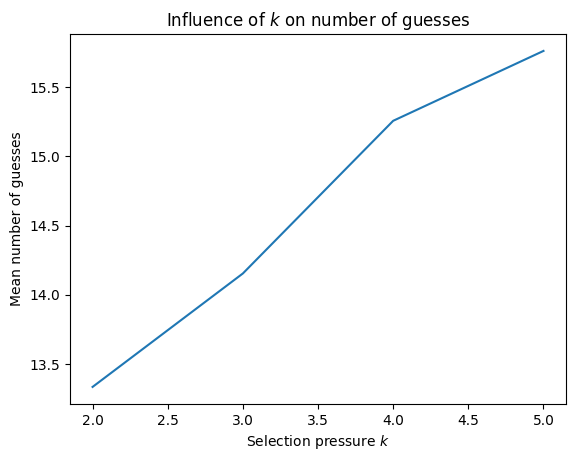

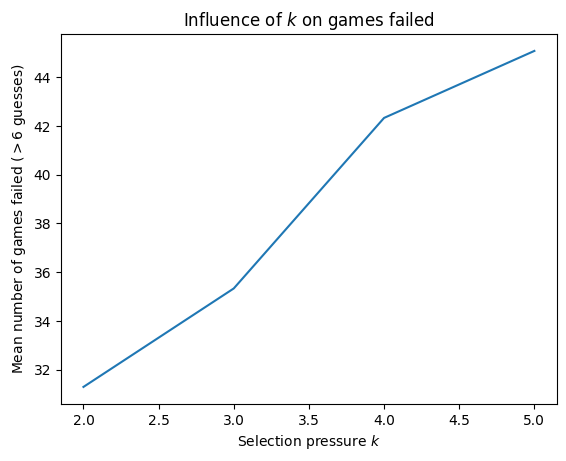

In [8]:
plt.plot(table_k.index.values, table_k['mean number of guesses'], label='mean number of guesses')
plt.title("Influence of $k$ on number of guesses")
plt.xlabel("Selection pressure $k$")
plt.ylabel('Mean number of guesses')
plt.show()
plt.plot(table_k.index.values, table_k['failed_games'], label='mean number of games failed ($>6$ guesses)')
plt.title("Influence of $k$ on games failed")
plt.xlabel("Selection pressure $k$")
plt.ylabel('Mean number of games failed ($>6$ guesses)')
plt.show()

In [9]:
table_mu = table.groupby(['mu']).aggregate(aggr_funcs)
table_mu[:9]

C:\Users\sebb0\AppData\Local\Temp\ipykernel_16848\221502574.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  table_mu[:9]


failed_games  mean number of guesses
mu                                         
0.000         86.75                 24.9204
0.001         85.40                 25.1524
0.010         56.35                 20.5684
0.080          2.20                  7.4198
0.100          0.90                  6.2328
0.150          0.00                  4.4492

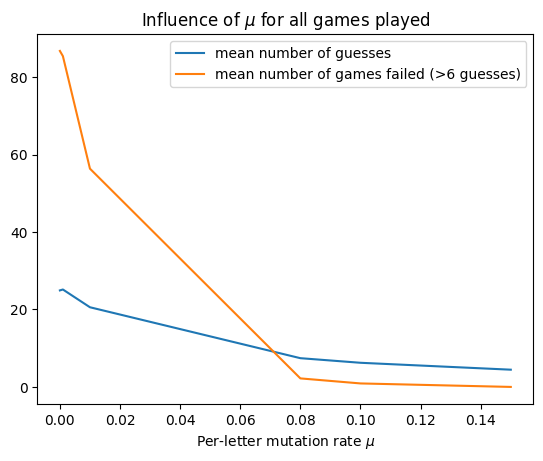

In [10]:
plt.plot(table_mu.index.values, table_mu['mean number of guesses'], label='mean number of guesses')
plt.plot(table_mu.index.values, table_mu['failed_games'], label='mean number of games failed (>6 guesses)')
plt.title("Influence of $\mu$ for all games played")
plt.xlabel("Per-letter mutation rate $\mu$")
plt.legend()

In [11]:
table.groupby(['elitist']).aggregate(aggr_funcs)

failed_games  mean number of guesses
elitist                                      
False       31.016667               13.627133
True        46.183333               15.953867

In [12]:
table.groupby(['memetic']).aggregate(aggr_funcs)

failed_games  mean number of guesses
memetic                                      
False       39.983333                 15.1114
True        37.216667                 14.4696

In [13]:
table.loc[table['mean number of guesses'].idxmin()]
table.sort_values('mean number of guesses')[:10]

elitist  memetic    k    mu                selection  \
95     False     True  5.0  0.15     tournament_selection   
155     True     True  2.0  0.15     tournament_selection   
167     True     True  3.0  0.15     tournament_selection   
59     False     True  2.0  0.15     tournament_selection   
11     False    False  2.0  0.15     tournament_selection   
71     False     True  3.0  0.15     tournament_selection   
154     True     True  NaN  0.15  probabilistic_selection   
83     False     True  4.0  0.15     tournament_selection   
58     False     True  NaN  0.15  probabilistic_selection   
35     False    False  4.0  0.15     tournament_selection   

                                     number of guesses  \
95   [5.0, 8.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 2.0, ...   
155  [3.0, 3.0, 5.0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, ...   
167  [3.0, 3.0, 4.0, 4.0, 7.0, 4.0, 4.0, 4.0, 3.0, ...   
59   [4.0, 3.0, 4.0, 4.0, 6.0, 5.0, 4.0, 3.0, 4.0, ...   
11   [3.0, 4.0, 3.0, 5.0, 5.0, 2.0, 2.0, 4.0, 3.0, ...   
71   [4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, ...   
154  [6.0, 3.0, 3.0, 3.0, 3.0, 12.0, 2.0, 3.0, 4.0,...   
83   [7.0, 4.0, 4.0, 11.0, 5.0, 3.0, 5.0, 5.0, 3.0,...   
58   [3.0, 5.0, 3.0, 3.0, 6.0, 3.0, 3.0, 4.0, 4.0, ...   
35   [3.0, 3.0, 4.0, 5.0, 4.0, 4.0, 3.0, 3.0, 2.0, ...   

     mean number of guesses  failed_games  
95                    4.112             0  
155                   4.204             0  
167                   4.240             0  
59                    4.240             0  
11                    4.276             0  
71                    4.320             0  
154                   4.348             0  
83                    4.372             0  
58                    4.428             0  
35                    4.456             0